In [1]:
## Reproducible Data Analysis in Jupyter
## https://www.youtube.com/watch?v=_ZEWDGpM-vM&list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ
## https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k

In [9]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [10]:
from urllib.request import urlretrieve
urlretrieve(URL, 'fremont_bicycle.csv')

('fremont_bicycle.csv', <http.client.HTTPMessage at 0x10ba02700>)

In [15]:
import pandas as pd 
data = pd.read_csv('fremont_bicycle.csv', index_col='Date', parse_dates=True)
## index_col, parse_dates(Timestamp)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [23]:
data.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,134105.000000,134105.000000,134105.000000
mean,113.085262,51.613482,61.471780
std,144.184329,66.510698,89.811273
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


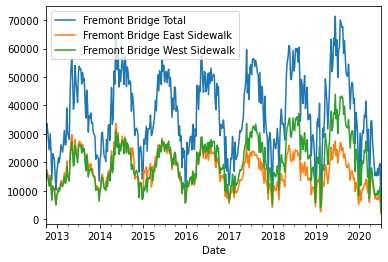

In [24]:
_=data.resample('w').sum().plot()
## data.plot()
## data.resample: time series 

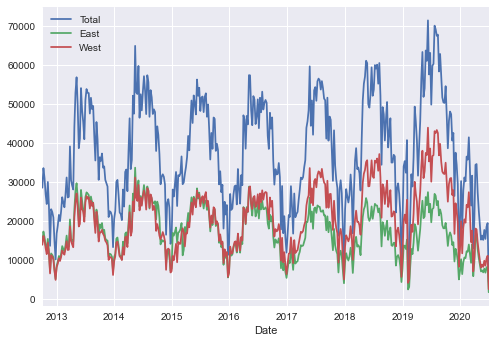

In [28]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ['Total', 'East', 'West']
## the original data changed 
_=data.resample('w').sum().plot()

(0.0, 2505041.6)

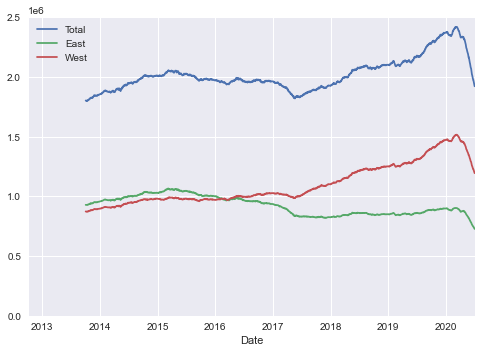

In [36]:
ax = data.resample('d').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)
## rolling window caculation: previous 365
## None: current maximum 

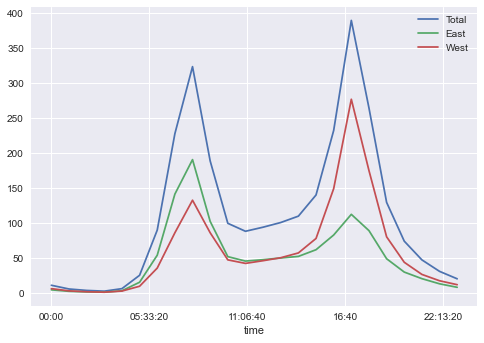

In [38]:
_=data.groupby(data.index.time).mean().plot()

In [43]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
## column to aggregate, optional 
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


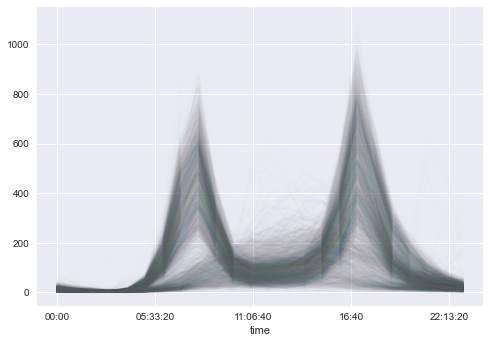

In [46]:
pivoted.plot(alpha=0.01, legend = False)

In [ ]:
## github: create a new repository 
## github: code HTTP
## git clone https://github.com/Violet-Fan/jupyter_workflow.git
## mv jupyter_workflow.ipynb jupyter_workflow
## cd ../
## cd jupyter_workflow 
## git status 